In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os


import matplotlib.pyplot as plt

In [3]:
fig_dir = './Figures/DAS/'

In [4]:
def read_data(datapath, drop_title, fig_dir, Fs=400.641):
    w1_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_1_time.csv'), delimiter=','))[1]
    w2_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_2_time.csv'), delimiter=','))[1]
    w3_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_3_time.csv'), delimiter=','))[1]
    w4_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_4_time.csv'), delimiter=','))[1]
    w5_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_5_time.csv'), delimiter=','))[1]
    
    w6_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_6_time.csv'), delimiter=','))[1]
    w7_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_7_time.csv'), delimiter=','))[1]
    w8_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_8_time.csv'), delimiter=','))[1]
    w9_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_9_time.csv'), delimiter=','))[1]
    w10_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_10_time.csv'), delimiter=','))[1]
    
    w11_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_11_time.csv'), delimiter=','))[1]
    w12_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_12_time.csv'), delimiter=','))[1]
    w13_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_13_time.csv'), delimiter=','))[1]
    w14_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_14_time.csv'), delimiter=','))[1]
    w15_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_15_time.csv'), delimiter=','))[1]

    data_list = [[w1_data,  w2_data,  w3_data,  w4_data,  w5_data],
                 [w6_data,  w7_data,  w8_data,  w9_data,  w10_data],
                 [w11_data, w12_data, w13_data, w14_data, w15_data],
                ]
    wrap_names = [['wrap %i'%i for i in range(1,6)],['wrap %i'%i for i in range(6,11)],['wrap %i'%i for i in range(11,16)],
                 ]
    dt = 1/Fs
    t = np.arange(0,len(w1_data)*dt,dt)

    return data_list, wrap_names, t

In [31]:
def overlayplot(data_list, wrap_names, t, tmin, tmax, xshift=0.1):
    if len(t)!=len(data_list[0][0]):
        print(len(data_list[0][0]), len(t))
        t = t[:len(data_list[0][0])]
    fig,axs = plt.subplots(5,3, figsize=[15,7], sharex=True)
    for i in range(5):
        for j in range(3):
            axs[i,j].plot(t,data_list[j][i])
            axs[i,j].set_title(wrap_names[j][i])
            axs[i,j].set_ylim([-1*np.max(data_list[j][i]),np.max(data_list[j][i])])
    for ax in axs[4]: ax.set_xlabel('Time (s)'), ax.set_xlim([tmin,tmax])
    fig.suptitle(drop_title,fontsize=24, fontweight='bold')
    fig.tight_layout()
    fig.savefig(os.path.join(fig_dir,'CU_overview_%s.png'%drop_title))

    fig,axs = plt.subplots(3,1, figsize=[15,9], sharex=True)
    for i in range(5):
        for j in range(3):
            axs[j].plot(t,(xshift*i)+data_list[j][i], label=wrap_names[j][i])
    for ax in axs: ax.legend()
    axs[2].set_xlabel('Time (s)'), axs[2].set_xlim([tmin,tmax])
    fig.suptitle(drop_title,fontsize=24, fontweight='bold')
    fig.tight_layout()
    fig.savefig(os.path.join(fig_dir,'CU_overlay_%s.png'%drop_title))

In [18]:
def DAS_to_2D(origdata):
    data_3D = origdata.reshape([origdata.shape[0],origdata.shape[1]//3,3])
    data_3D = data_3D.transpose([2,0,1])
    data_2D = data_3D.reshape([3,data_3D.shape[1]*data_3D.shape[2]])
    return data_2D

def DAS_to_1D(origdata):
    print(origdata.shape)
    data_1D = origdata.T.reshape([origdata.shape[0]*origdata.shape[1]])
    return data_1D

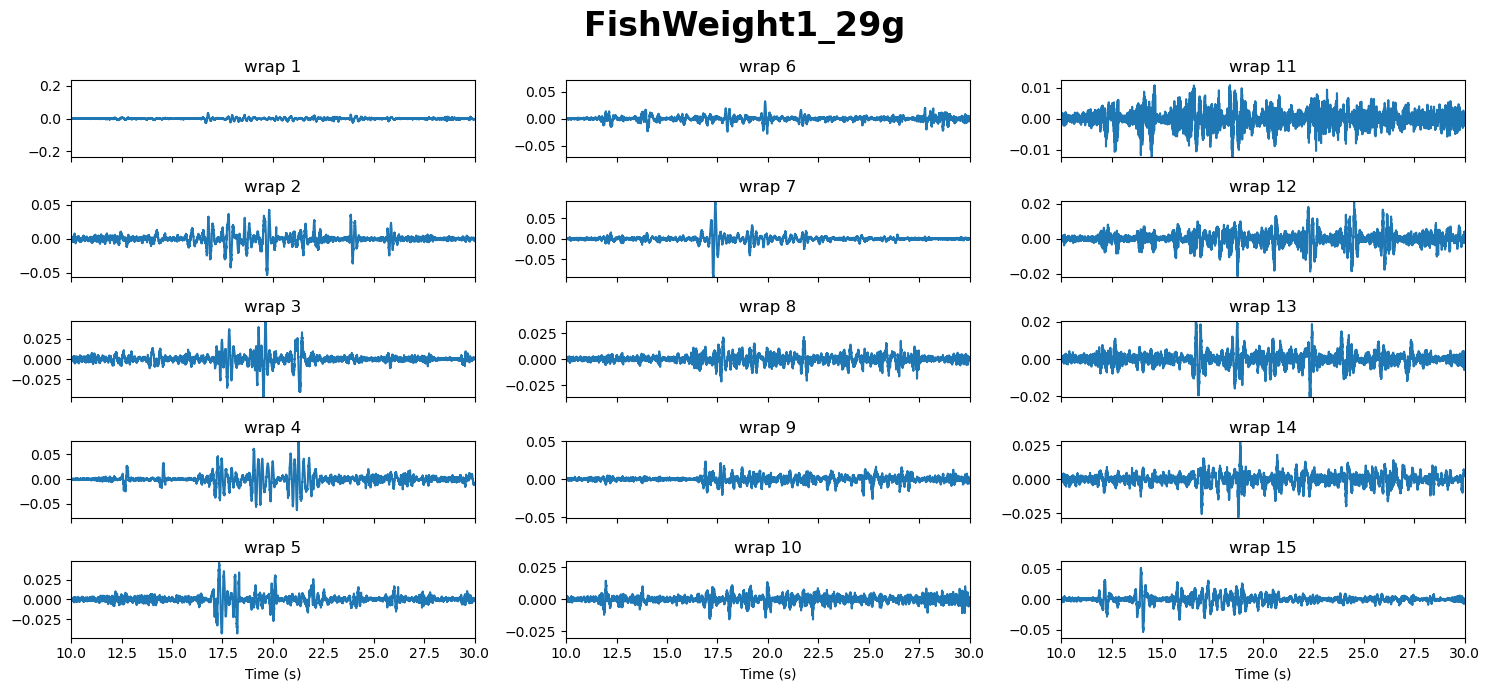

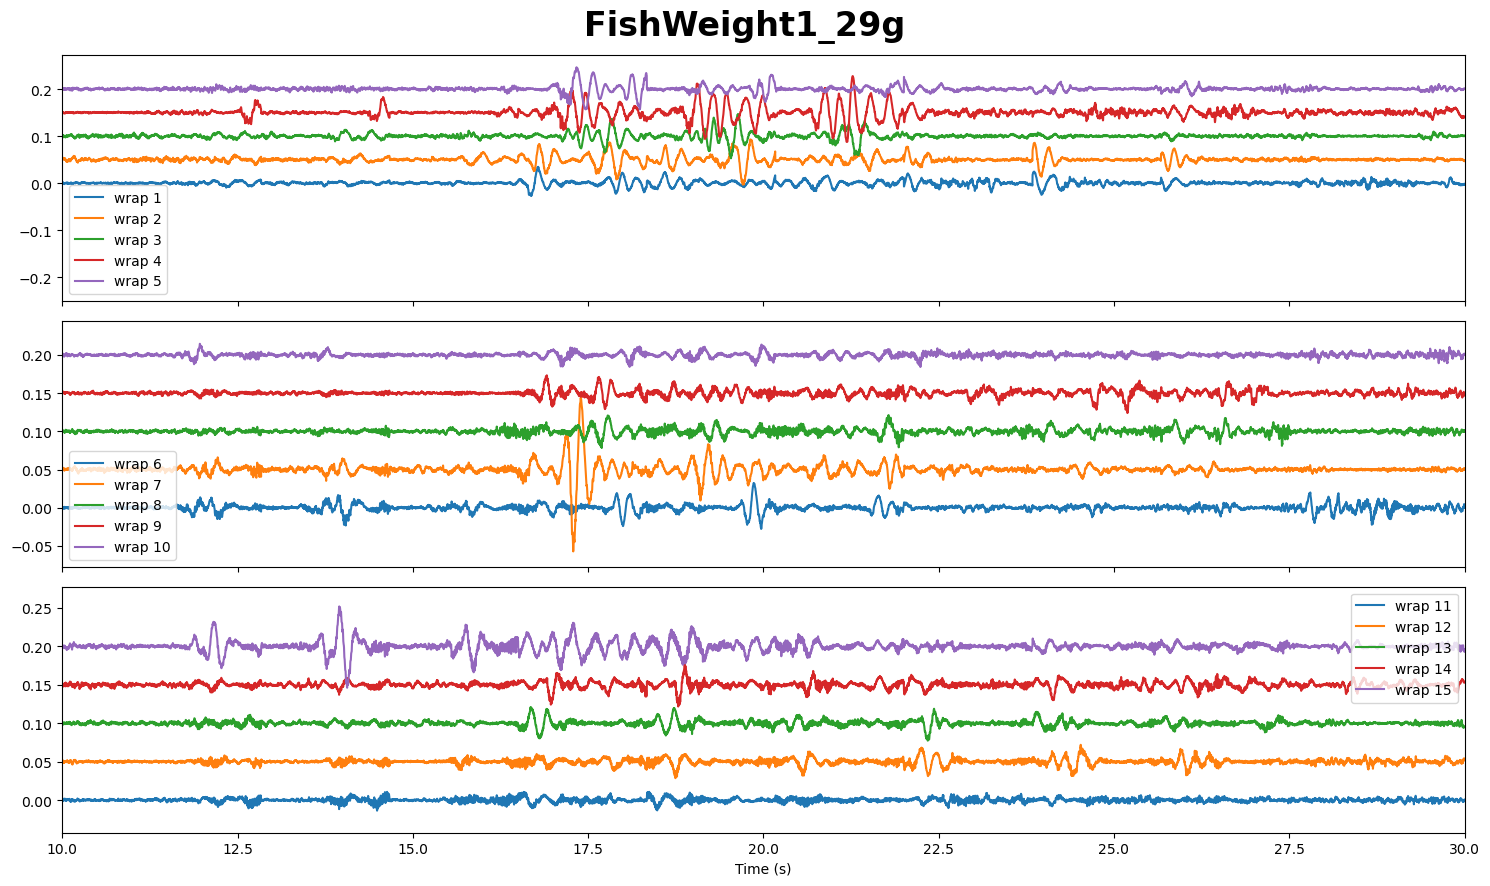

In [36]:
# drop_title = 'FishWeight3_T1_85g'
# datapath = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Drop Ball Test/Low frequency/Data_Wednesday_January_31_2024_2_31_08_PM/Processed data/Processed data'
# data_list, wrap_names, t = read_data(datapath, drop_title, fig_dir, Fs=400.641)
# overlayplot(data_list, wrap_names, t, tmin=92.5, tmax=105)

# drop_title = 'FishWeight3_T2_85g'
# datapath = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Drop Ball Test/Low frequency/Data_Wednesday_January_31_2024_2_38_36_PM/Processed data/Processed data'
# data_list, wrap_names, t = read_data(datapath, drop_title, fig_dir, Fs=400.641)
# overlayplot(data_list, wrap_names, t, tmin=280, tmax=300)

# drop_title = 'Metal_Tube_127g'
# datapath = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Drop Ball Test/Low frequency/Data_Wednesday_January_31_2024_2_53_23_PM/Processed data/Processed data'
# data_list, wrap_names, t = read_data(datapath, drop_title, fig_dir, Fs=400.641)
# overlayplot(data_list, wrap_names, t, tmin=330, tmax=350)


# drop_title = 'FishWeight2_55g'
# datapath = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Drop Ball Test/Low frequency/Data_Wednesday_January_31_2024_3_03_53_PM/Processed data/Processed data'
# data_list, wrap_names, t = read_data(datapath, drop_title, fig_dir, Fs=400.641)
# overlayplot(data_list, wrap_names, t, tmin=70, tmax=80, xshift=0.015)


drop_title = 'FishWeight1_29g'
datapath = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Drop Ball Test/Low frequency/Data_Wednesday_January_31_2024_3_08_14_PM/Processed data/Processed data'
data_list, wrap_names, t = read_data(datapath, drop_title, fig_dir, Fs=400.641)
overlayplot(data_list, wrap_names, t, tmin=10, tmax=30, xshift=0.05)


# drop_title = 'WhiteBead_2g'
# datapath = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Drop Ball Test/Low frequency/Data_Wednesday_January_31_2024_3_12_54_PM/Processed data/Processed data'
# data_list, wrap_names, t = read_data(datapath, drop_title, fig_dir, Fs=400.641)
# overlayplot(data_list, wrap_names, t, tmin=0, tmax=max(t))

# drop_title = 'GoldBead_06g'
# datapath = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Drop Ball Test/Low frequency/Data_Wednesday_January_31_2024_3_16_27_PM/Processed data/Processed data'
# data_list, wrap_names, t = read_data(datapath, drop_title, fig_dir, Fs=400.641)
# overlayplot(data_list, wrap_names, t, tmin=0, tmax=max(t))



In [44]:
w1_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_1_time.csv'), delimiter=','))[1]
w2_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_2_time.csv'), delimiter=','))[1]
w3_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_3_time.csv'), delimiter=','))[1]
w4_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_4_time.csv'), delimiter=','))[1]
w5_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_5_time.csv'), delimiter=','))[1]

w6_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_6_time.csv'), delimiter=','))[1]
w7_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_7_time.csv'), delimiter=','))[1]
w8_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_8_time.csv'), delimiter=','))[1]
w9_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_9_time.csv'), delimiter=','))[1]
w10_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_10_time.csv'), delimiter=','))[1]

w11_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_11_time.csv'), delimiter=','))[1]
w12_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_12_time.csv'), delimiter=','))[1]
w13_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_13_time.csv'), delimiter=','))[1]
w14_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_14_time.csv'), delimiter=','))[1]
w15_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_15_time.csv'), delimiter=','))[1]

In [61]:
data_list = [[w1_data,  w2_data,  w3_data,  w4_data,  w5_data],
             [w6_data,  w7_data,  w8_data,  w9_data,  w10_data],
             [w11_data, w12_data, w13_data, w14_data, w15_data],
            ]
wrap_names = [['wrap %i'%i for i in range(1,6)],['wrap %i'%i for i in range(6,11)],['wrap %i'%i for i in range(11,16)],
             ]
print(wrap_names)

[['wrap 1', 'wrap 2', 'wrap 3', 'wrap 4', 'wrap 5'], ['wrap 6', 'wrap 7', 'wrap 8', 'wrap 9', 'wrap 10'], ['wrap 11', 'wrap 12', 'wrap 13', 'wrap 14', 'wrap 15']]


In [50]:
Fs = 400.641 # Hz
dt = 1/Fs
dt

t = np.arange(0,len(w1_data)*dt,dt)

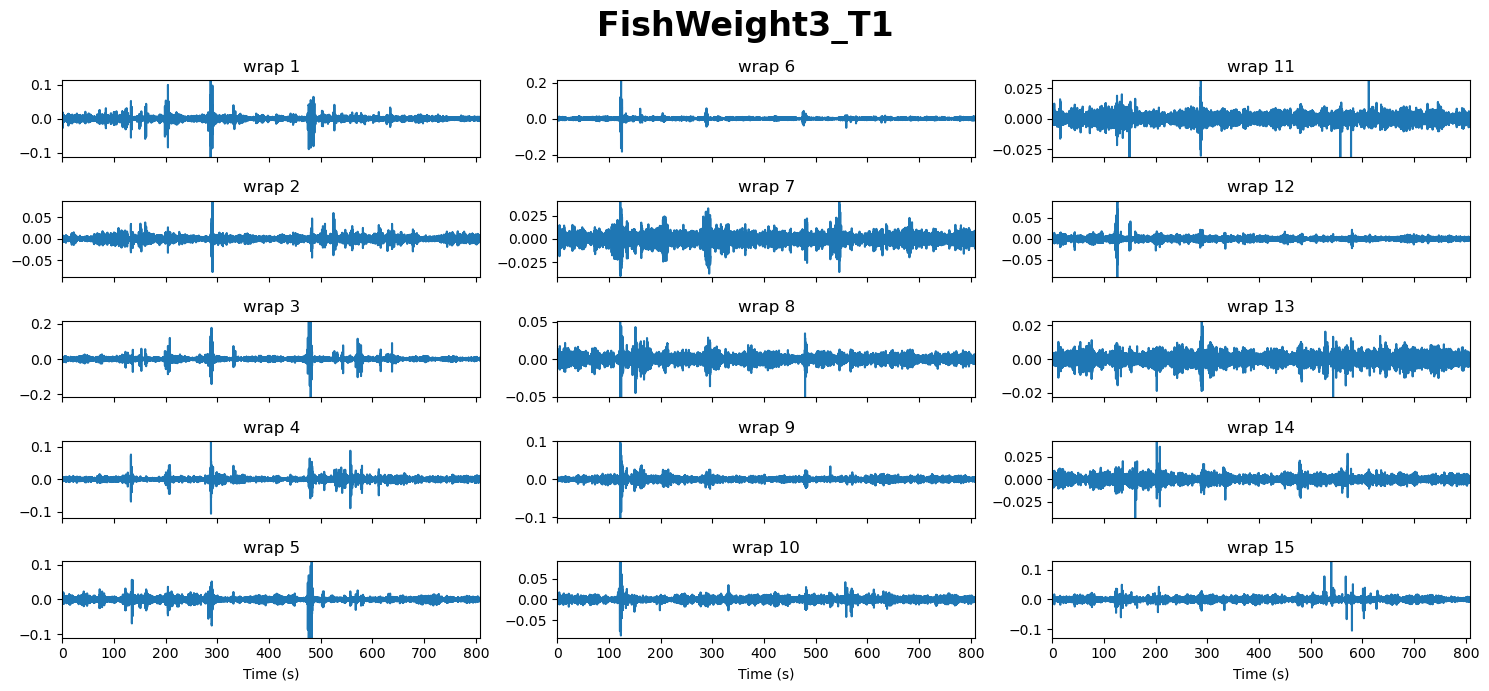

In [70]:
fig,axs = plt.subplots(5,3, figsize=[15,7], sharex=True)
for i in range(5):
    for j in range(3):
        axs[i,j].plot(t,data_list[j][i])
        axs[i,j].set_title(wrap_names[j][i])
        axs[i,j].set_ylim([-1*np.max(data_list[j][i]),np.max(data_list[j][i])])
for ax in axs[4]: ax.set_xlabel('Time (s)'), ax.set_xlim([0,max(t)])
fig.suptitle(drop_title,fontsize=24, fontweight='bold')
fig.tight_layout()

In [39]:
w1_data.shape

(323988,)

Text(0, 0.5, 'wrap 10')

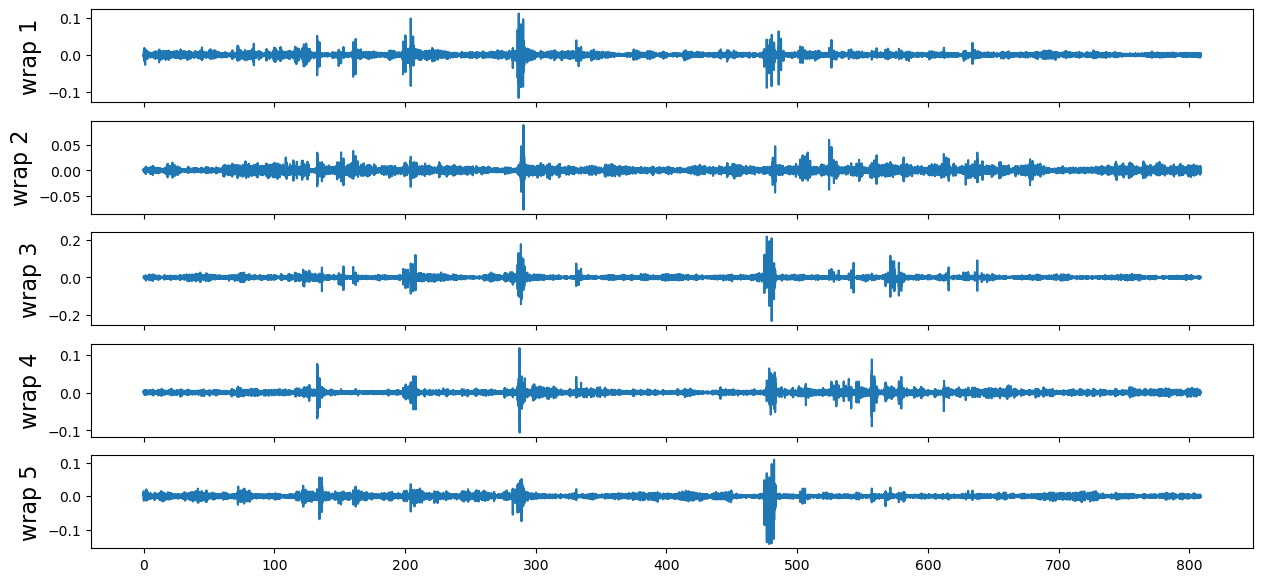

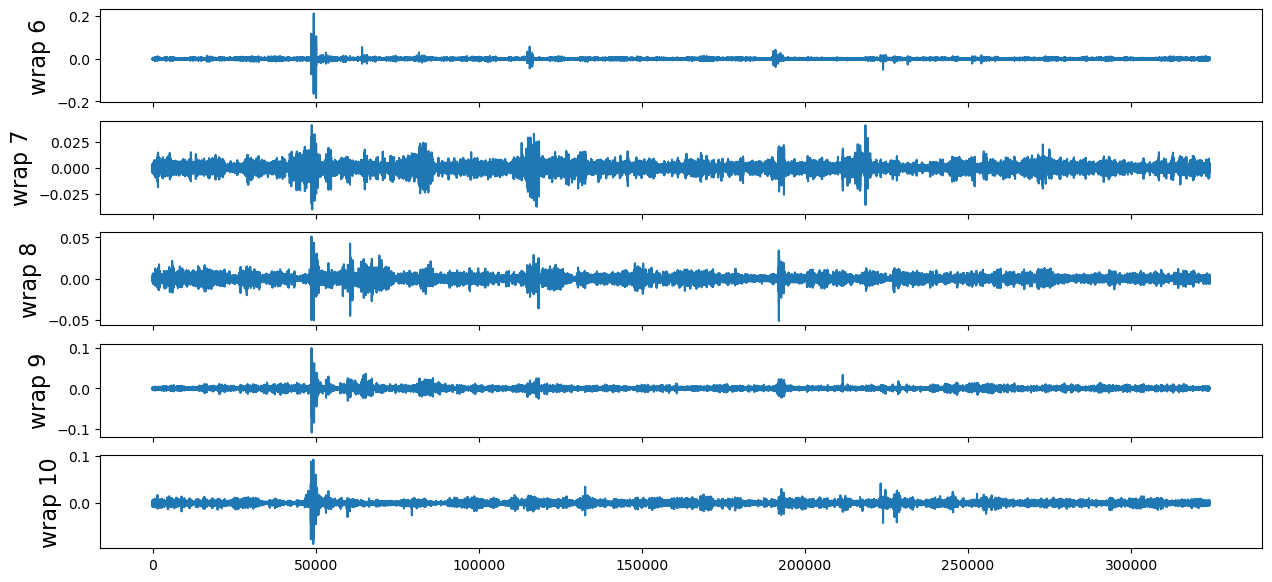

In [52]:
fig,axs = plt.subplots(5,1,figsize=[15,7], sharex=True)
axs[0].plot(t,w1_data)
axs[1].plot(t,w2_data)
axs[2].plot(t,w3_data)
axs[3].plot(t,w4_data)
axs[4].plot(t,w5_data)
axs[0].set_ylabel('wrap 1', fontsize=16)
axs[1].set_ylabel('wrap 2', fontsize=16)
axs[2].set_ylabel('wrap 3', fontsize=16)
axs[3].set_ylabel('wrap 4', fontsize=16)
axs[4].set_ylabel('wrap 5', fontsize=16)

fig,axs = plt.subplots(5,1,figsize=[15,7], sharex=True)
axs[0].plot(w6_data)
axs[1].plot(w7_data)
axs[2].plot(w8_data)
axs[3].plot(w9_data)
axs[4].plot(w10_data)
axs[0].set_ylabel('wrap 6', fontsize=16)
axs[1].set_ylabel('wrap 7', fontsize=16)
axs[2].set_ylabel('wrap 8', fontsize=16)
axs[3].set_ylabel('wrap 9', fontsize=16)
axs[4].set_ylabel('wrap 10', fontsize=16)

(45000.0, 55000.0)

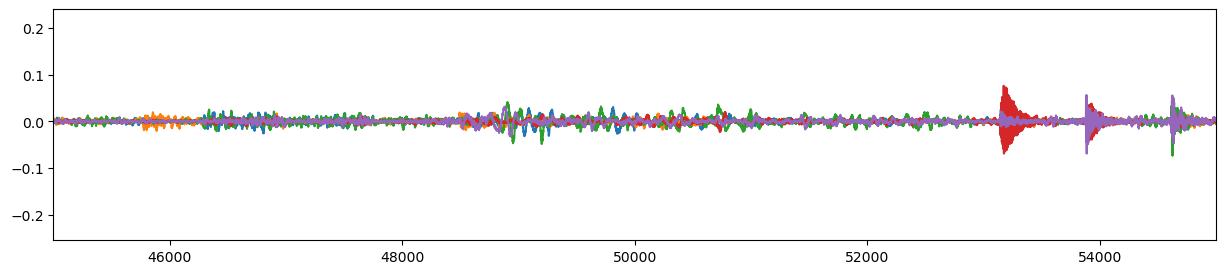

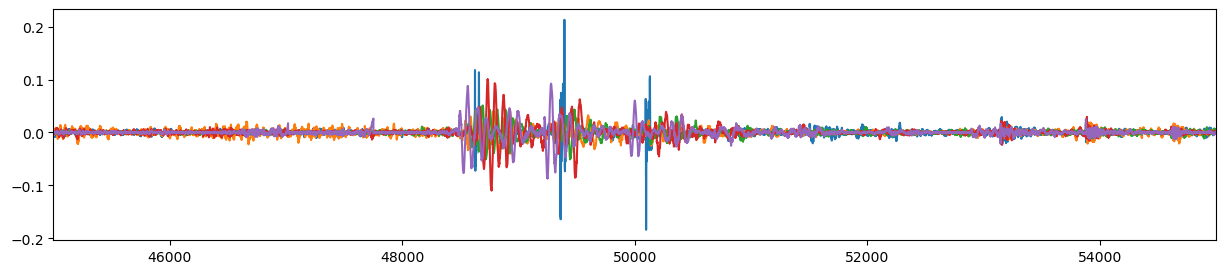

In [43]:
fig,ax = plt.subplots(1,1,figsize=[15,3], sharex=True)
ax.plot(w1_data)
ax.plot(w2_data)
ax.plot(w3_data)
ax.plot(w4_data)
ax.plot(w5_data)
ax.set_xlim([45000,55000])

fig,ax = plt.subplots(1,1,figsize=[15,3], sharex=True)
ax.plot(w6_data)
ax.plot(w7_data)
ax.plot(w8_data)
ax.plot(w9_data)
ax.plot(w10_data)
ax.set_xlim([45000,55000])